In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

In [5]:
comments = pd.read_csv(r'E:\Scaler DS\Scaler - Data Engineering\Projects\UScomments.csv', on_bad_lines = 'warn')

Skipping line 41589: expected 4 fields, saw 11
Skipping line 51628: expected 4 fields, saw 7
Skipping line 114465: expected 4 fields, saw 5

Skipping line 142496: expected 4 fields, saw 8
Skipping line 189732: expected 4 fields, saw 6
Skipping line 245218: expected 4 fields, saw 7

Skipping line 388430: expected 4 fields, saw 5

C:\Users\hp\AppData\Local\Temp\ipykernel_3064\4161677196.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv(r'E:\Scaler DS\Scaler - Data Engineering\Projects\UScomments.csv', on_bad_lines = 'warn')


In [6]:
comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [7]:
comments.dropna(inplace=True)

In [8]:
!pip install matplotlib

In [9]:
!pip install seaborn

In [10]:
!pip install textblob

In [11]:
polarity=[]
for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [12]:
comments['polarity'] = polarity

In [13]:
!pip install wordcloud

In [14]:
from wordcloud import WordCloud, STOPWORDS

In [15]:
comments_positive = comments[comments['polarity']==1]
comments_negative = comments[comments['polarity']==-1]

In [16]:
total_comments_negative = ' '.join(comments_negative['comment_text'])
total_comments_positive = ' '.join(comments_positive['comment_text'])

In [17]:
# total_comments[0:200]

(-0.5, 399.5, 199.5, -0.5)

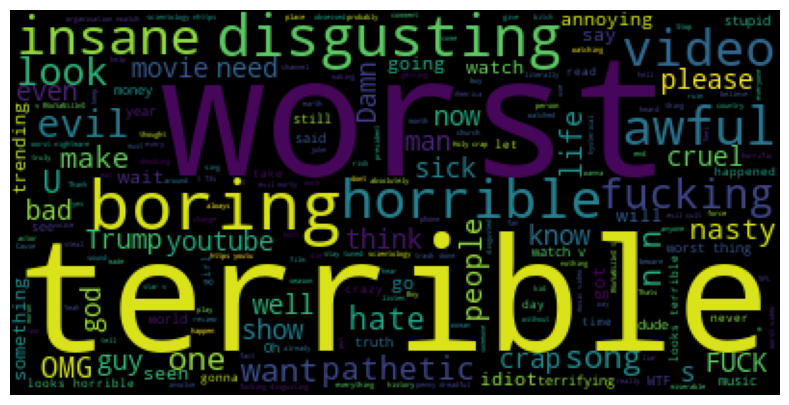

In [18]:
wordcloud_negative = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud_negative)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

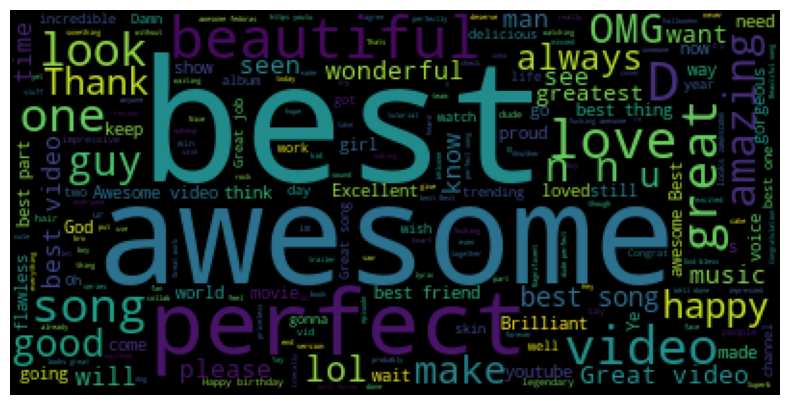

In [19]:
wordcloud_positive = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud_positive)
plt.axis('off')

In [20]:
## Emoji Analysis

In [21]:
!pip install emoji

In [22]:
import emoji
# print(dir(emoji))

In [23]:
emoji_list=[]
for comment in comments['comment_text']: # for iterating over every comment
    for char in comment : # for iterating over every character in a comment
        if char in emoji.EMOJI_DATA :
            emoji_list.append(char)    

In [24]:
# emoji_list[0:100]

In [25]:
from collections import Counter
#Counter(emoji_list)
Counter(emoji_list).most_common(15)
#Counter(emoji_list).most_common(15)[0]
#Counter(emoji_list).most_common(15)[0][0]
#Counter(emoji_list).most_common(15)[1][0]

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147),
 ('♥', 4909),
 ('😊', 3596),
 ('🏻', 3438),
 ('💜', 3429),
 ('😬', 3381)]

In [26]:
emojis=[]
for i in range(15):
    x = Counter(emoji_list).most_common(15)[i][0]
    emojis.append(x)

emoji_freq =[]
for i in range(15):
    y = Counter(emoji_list).most_common(15)[i][1]
    emoji_freq.append(y)

In [27]:
#!pip install plotly

In [28]:
import plotly.graph_objs as go
from plotly.offline import iplot
emoji_bar = go.Bar(x=emojis,y=emoji_freq)
iplot([emoji_bar])

In [29]:
## Importing data

In [30]:
import os
#import glob
path =r'E:\Scaler DS\Scaler - Data Engineering\Projects\Youtube_project_shan_singh\Youtube_project_shan_singh\additional_data'

In [31]:
files = os.listdir(path)

In [32]:
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [33]:
files_csv = [files[i] for i in range(0,len(files),2)]
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [34]:
#filenames = glob.glob(path + "/*files_csv")
currentdf = pd.DataFrame()
fulldf = pd.DataFrame()
for filename in files_csv :
    currentdf = pd.read_csv(path + '/' + filename, encoding='iso-8859-1', on_bad_lines='warn')
    currentdf['country'] = filename.split('.')[0][0:2]
    fulldf = pd.concat([fulldf,currentdf])

In [35]:
fulldf.tail()

video_id trending_date  \
40944  BZt0qjTWNhw      18.14.06   
40945  1h7KV2sjUWY      18.14.06   
40946  D6Oy4LfoqsU      18.14.06   
40947  oV0zkMe1K8s      18.14.06   
40948  ooyjaVdt-jA      18.14.06   

                                                   title  \
40944                       The Cat Who Caught the Laser   
40945                         True Facts : Ant Mutualism   
40946  I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...   
40947                How Black Panther Should Have Ended   
40948  Official Call of DutyÂ®: Black Ops 4 âÂ Mult...   

                  channel_title  category_id              publish_time  \
40944             AaronsAnimals           15  2018-05-18T13:00:04.000Z   
40945                  zefrank1           22  2018-05-18T01:00:06.000Z   
40946                Brad Mondo           24  2018-05-18T17:34:22.000Z   
40947  How It Should Have Ended            1  2018-05-17T17:00:04.000Z   
40948              Call of Duty           20  2018-05-17T17:09:38.000Z   

                                                    tags     views   likes  \
40944  aarons animals|"aarons"|"animals"|"cat"|"cats"...   1685609   38160   
40945                                             [none]   1064798   60008   
40946  I gave safiya nygaard a perfect hair makeover ...   1066451   48068   
40947  Black Panther|"HISHE"|"Marvel"|"Infinity War"|...   5660813  192957   
40948      call of duty|"cod"|"activision"|"Black Ops 4"  10306119  357079   

       dislikes  comment_count  \
40944      1385           2657   
40945       382           3936   
40946      1032           3992   
40947      2846          13088   
40948    212976         144795   

                                       thumbnail_link  comments_disabled  \
40944  https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg              False   
40945  https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg              False   
40946  https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg              False   
40947  https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg              False   
40948  https://i.ytimg.com/vi/ooyjaVdt-jA/default.jpg              False   

       ratings_disabled  video_error_or_removed  \
40944             False                   False   
40945             False                   False   
40946             False                   False   
40947             False                   False   
40948             False                   False   

                                             description country  
40944     The Cat Who Caught the Laser - Aaron's Animals      US  
40945                                                NaN      US  
40946  I had so much fun transforming Safiyas hair in...      US  
40947  How Black Panther Should Have EndedWatch More ...      US  
40948  Call of Duty: Black Ops 4 Multiplayer raises t...      US

In [36]:
# Analysing most liked category

In [37]:
cat = pd.read_csv('E:\Scaler DS\Scaler - Data Engineering\Projects\Youtube_project_shan_singh\Youtube_project_shan_singh/category_file.txt', sep=(':'))

In [38]:
cat.reset_index(inplace=True)

In [44]:
cat.columns =['category_id','category_name']
cat.set_index('category_id', inplace=True)
cat

category_name
category_id                        
1                  Film & Animation
2                  Autos & Vehicles
10                            Music
15                   Pets & Animals
17                           Sports
18                     Short Movies
19                  Travel & Events
20                           Gaming
21                    Videoblogging
22                   People & Blogs
23                           Comedy
24                    Entertainment
25                  News & Politics
26                    Howto & Style
27                        Education
28             Science & Technology
29            Nonprofits & Activism
30                           Movies
31                  Anime/Animation
32                 Action/Adventure
33                         Classics
34                           Comedy
35                      Documentary
36                            Drama
37                           Family
38                          Foreign
39                           Horror
40                   Sci-Fi/Fantasy
41                         Thriller
42                           Shorts
43                            Shows
44             Trailers

In [45]:
dct = cat.to_dict()
dct

{'category_name': {1: ' Film & Animation',
  2: ' Autos & Vehicles',
  10: ' Music',
  15: ' Pets & Animals',
  17: ' Sports',
  18: ' Short Movies',
  19: ' Travel & Events',
  20: ' Gaming',
  21: ' Videoblogging',
  22: ' People & Blogs',
  23: ' Comedy',
  24: ' Entertainment',
  25: ' News & Politics',
  26: ' Howto & Style',
  27: ' Education',
  28: ' Science & Technology',
  29: ' Nonprofits & Activism',
  30: ' Movies',
  31: ' Anime/Animation',
  32: ' Action/Adventure',
  33: ' Classics',
  34: ' Comedy',
  35: ' Documentary',
  36: ' Drama',
  37: ' Family',
  38: ' Foreign',
  39: ' Horror',
  40: ' Sci-Fi/Fantasy',
  41: ' Thriller',
  42: ' Shorts',
  43: ' Shows',
  44: ' Trailers            '}}

In [57]:
fulldf['category_name']= fulldf['category_id'].map(dct['category_name'])
fulldf.drop(["category name"], axis =1,inplace=True)
fulldf.head(5)

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description country   category_name  
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA           Music  
1  STill got a lot of packages. Probably will las...      CA          Comedy  
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...      CA          Comedy  
3  I know it's been a while since we did this sho...      CA   Entertainment  
4  ð§: https://ad.gt/yt-perfect\nð°: https://...      CA           Music

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

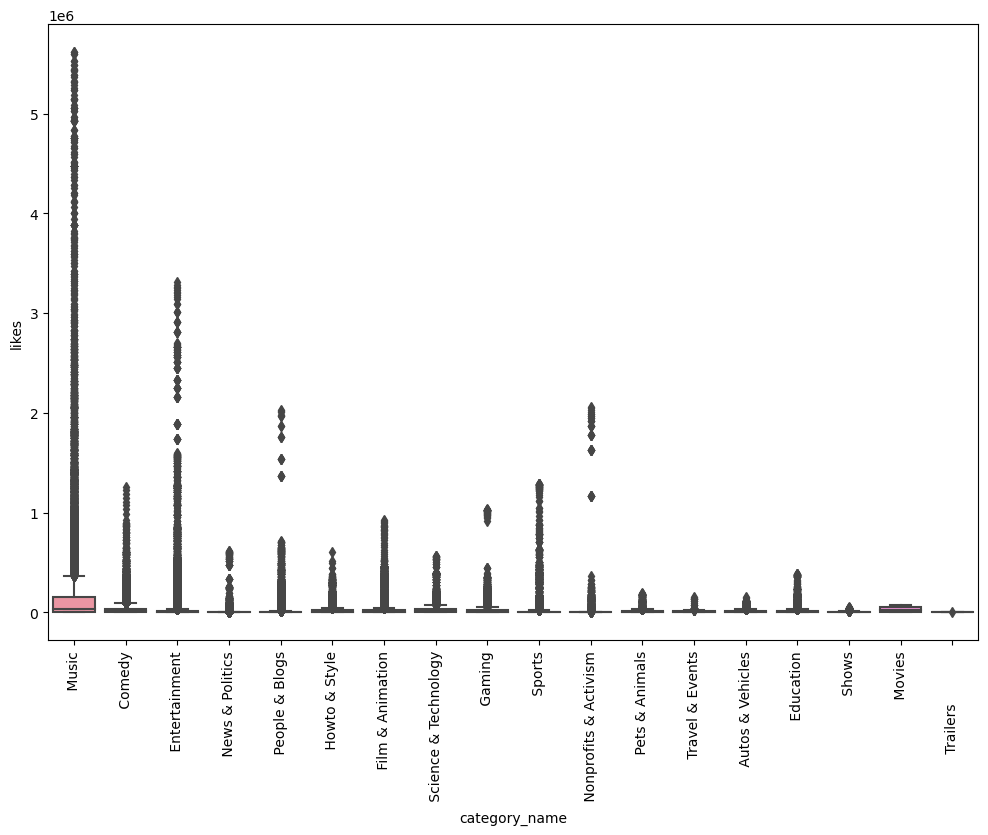

In [56]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name', y='likes', data=fulldf)
plt.xticks(rotation='vertical')

In [ ]:
#Engagement Analysis

In [58]:
fulldf['likes_rate']=(fulldf['likes']/fulldf['views'])*100
fulldf['dislikes_rate']=(fulldf['dislikes']/fulldf['views'])*100
fulldf['comment_rate']=(fulldf['comment_count']/fulldf['views'])*100

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

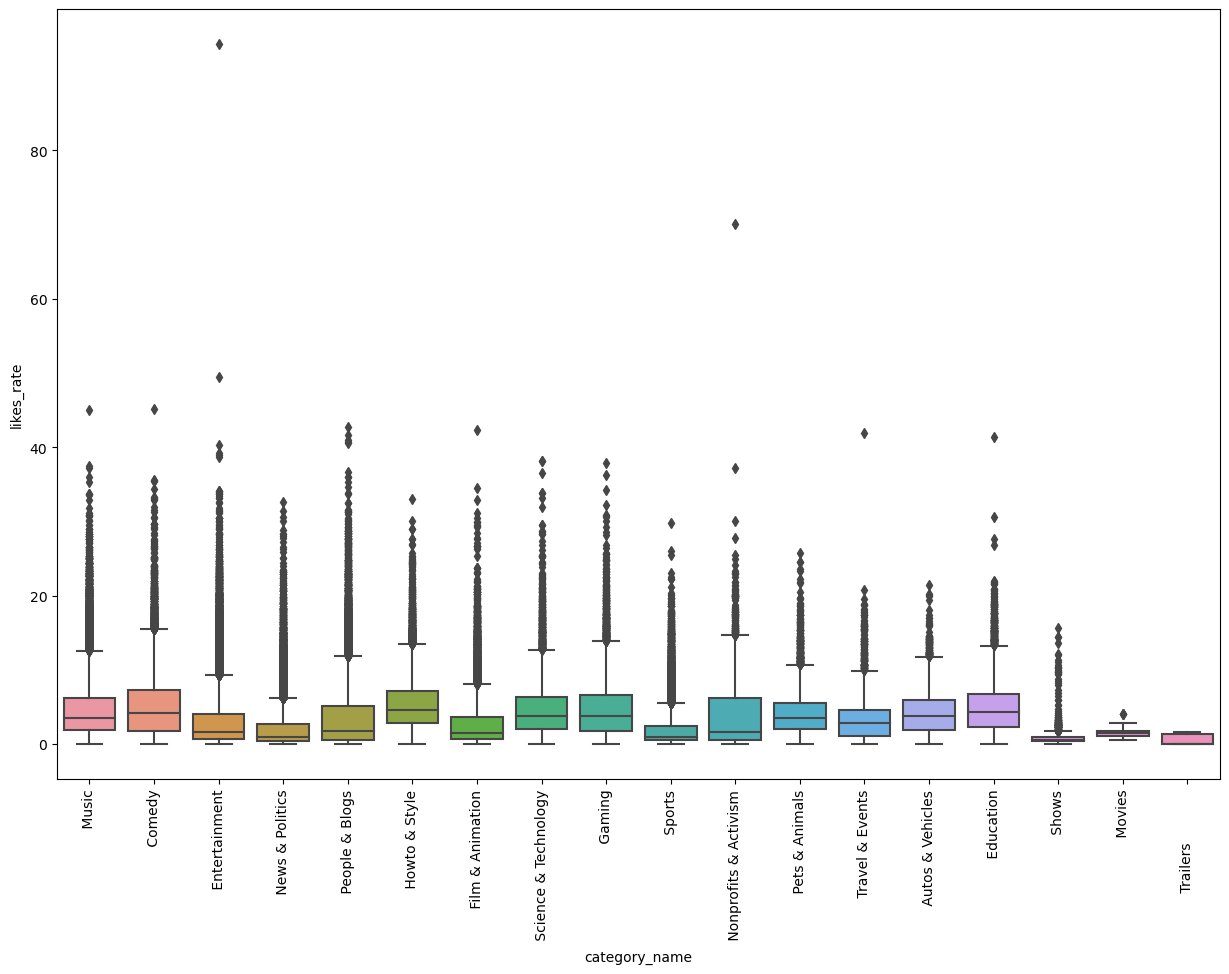

In [62]:
plt.figure(figsize=(15,10))
sns.boxplot(x='category_name', y='likes_rate', data=fulldf)
plt.xticks(rotation='vertical')

<Axes: >

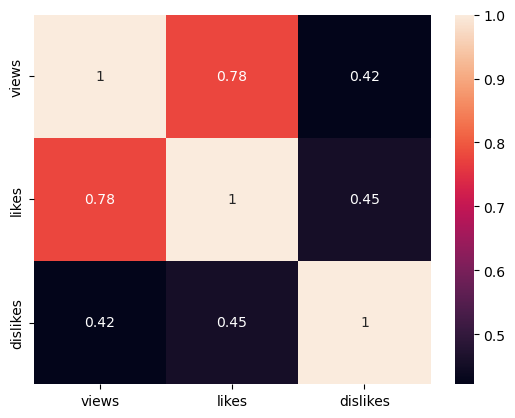

In [63]:
sns.heatmap(fulldf[['views','likes','dislikes']].corr(),annot=True)

In [64]:
#Analysing Trending Videos

In [67]:
channel_videos = fulldf.groupby('channel_title')['video_id'].count().sort_values(ascending=False).to_frame().reset_index().rename(columns={'video_id':'total_videos'})

In [68]:
import plotly.express as px

In [70]:
px.bar(data_frame=channel_videos[0:25], x = 'channel_title', y = 'total_videos')

In [71]:
#Does punctuation in titles and tags have any effect on likes and dislikes

In [73]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [74]:
def punc_count(x):
    return len([c for c in x if c in string.punctuation])

In [75]:
sample = fulldf[0:20000]

In [76]:
sample['punc_count'] = sample['title'].apply(punc_count)

C:\Users\hp\AppData\Local\Temp\ipykernel_3064\2992636929.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='punc_count', ylabel='views'>

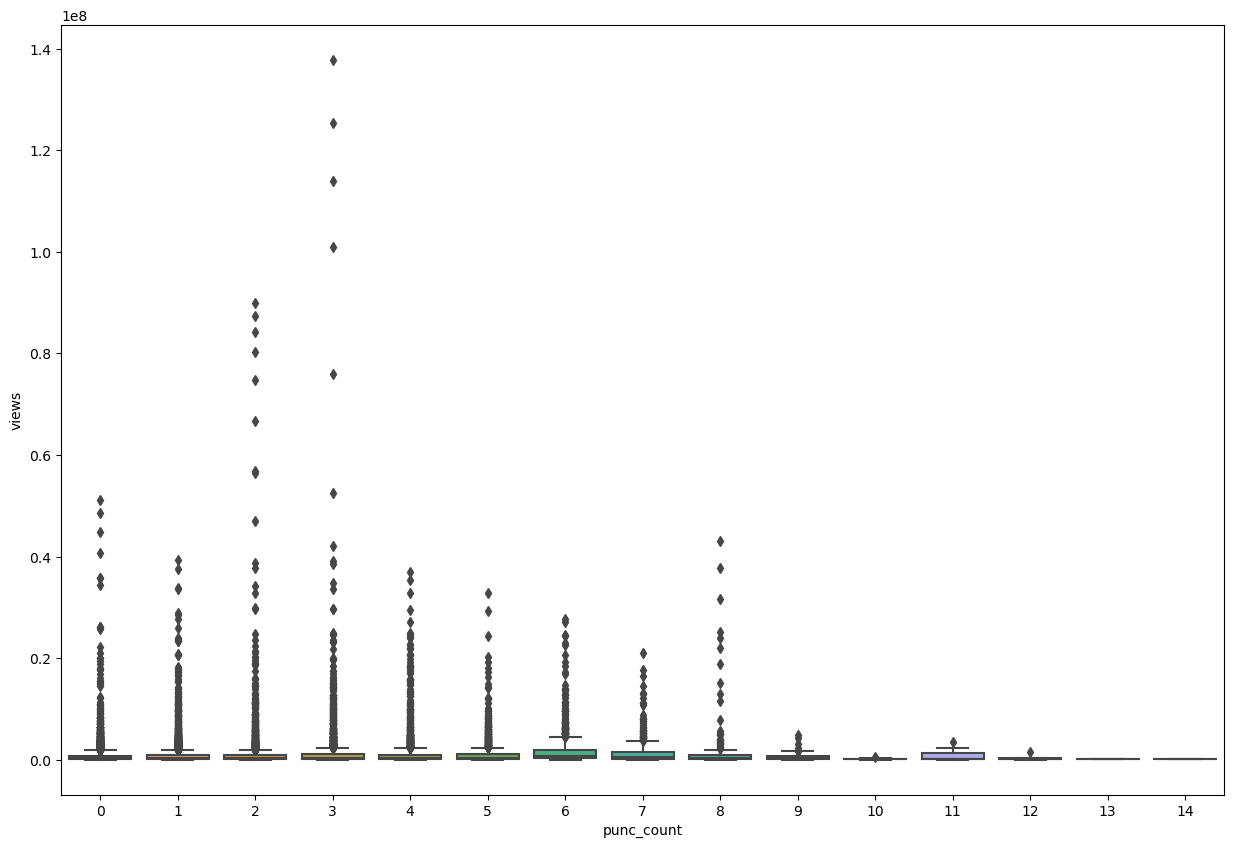

In [77]:
plt.figure(figsize=(15,10))
sns.boxplot(x='punc_count', y='views', data=sample)